In [1]:
import pandas as pd

# Load the dataset
ifood = pd.read_csv (r'C:\Users\holar\Documents\Excel Project\ifood_df.csv')

In [2]:
ifood

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [7]:
# Remove duplicate rows
ifood_cleaned = ifood.drop_duplicates()

# Replace negative values in 'MntRegularProds' with 0
ifood_cleaned.loc[:, 'MntRegularProds'] = ifood_cleaned['MntRegularProds'].apply(lambda x: max(x, 0))

In [8]:
# Save the cleaned dataset
ifood_cleaned.to_csv("cleaned_ifood_df.csv", index=False)

In [13]:
ifood_cleaned.to_csv(r'C:\Users\holar\Documents\Excel Project\cleaned_ifood_df.csv', index=False)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
# ---- STEP 1: DESCRIPTIVE STATISTICS ----

# Load cleaned dataset
ifood2 = pd.read_csv("cleaned_ifood_df.csv")

In [31]:
ifood2

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2017,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2018,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2019,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [32]:
ifood2.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,520.164275,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.461148,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [33]:
# Average spending in each category
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                 'MntSweetProducts', 'MntGoldProds']
avg_spending = ifood2[spending_cols].mean()

In [34]:
avg_spending

MntWines            306.492331
MntFruits            26.364671
MntMeatProducts     166.059871
MntFishProducts      37.603662
MntSweetProducts     27.268679
MntGoldProds         43.921821
dtype: float64

In [35]:
ifood_cleaned[spending_cols].sum().sort_values(ascending=False)

MntWines            619421
MntMeatProducts     335607
MntGoldProds         88766
MntFishProducts      75997
MntSweetProducts     55110
MntFruits            53283
dtype: int64

In [36]:
# Frequency of purchases
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
avg_purchases = ifood2[purchase_cols].mean()

In [37]:
avg_purchases

NumWebPurchases        4.115289
NumCatalogPurchases    2.644730
NumStorePurchases      5.807521
dtype: float64

In [38]:
# ---- STEP 2: CUSTOMER SEGMENTATION (K-Means Clustering) ----

# Selecting relevant features for clustering
features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumStorePurchases',
            'NumCatalogPurchases']

In [40]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ifood2[features])

In [41]:
# Finding optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

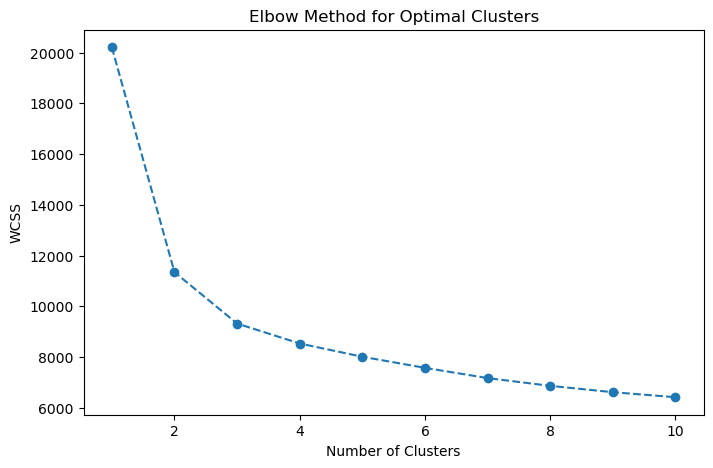

In [42]:
# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [43]:
# Apply K-Means with the optimal number of clusters (let's assume 4 based on Elbow method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
ifood2['Cluster'] = kmeans.fit_predict(scaled_features)

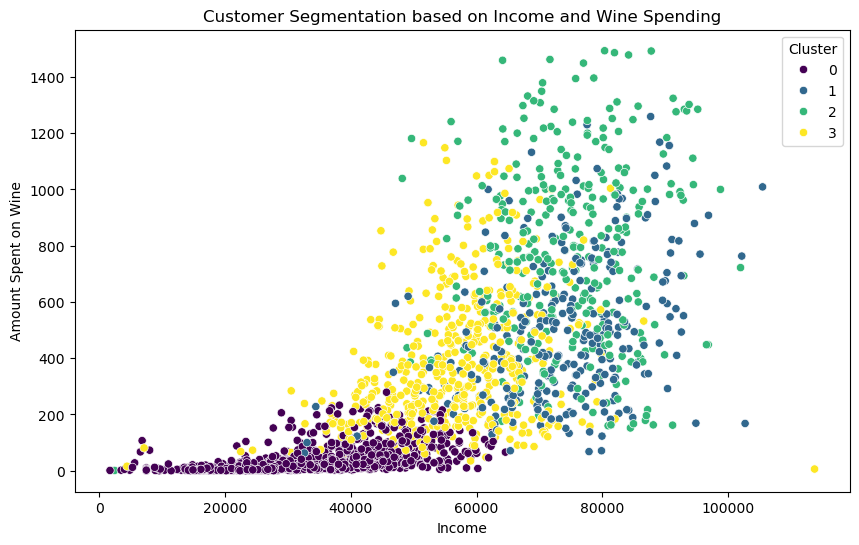

In [46]:
# --- VISUALIZE CLUSTERS ----

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ifood2['Income'], y=ifood2['MntWines'], hue=ifood2['Cluster'], palette='viridis')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wine')
plt.title('Customer Segmentation based on Income and Wine Spending')
plt.legend(title="Cluster")
plt.show()

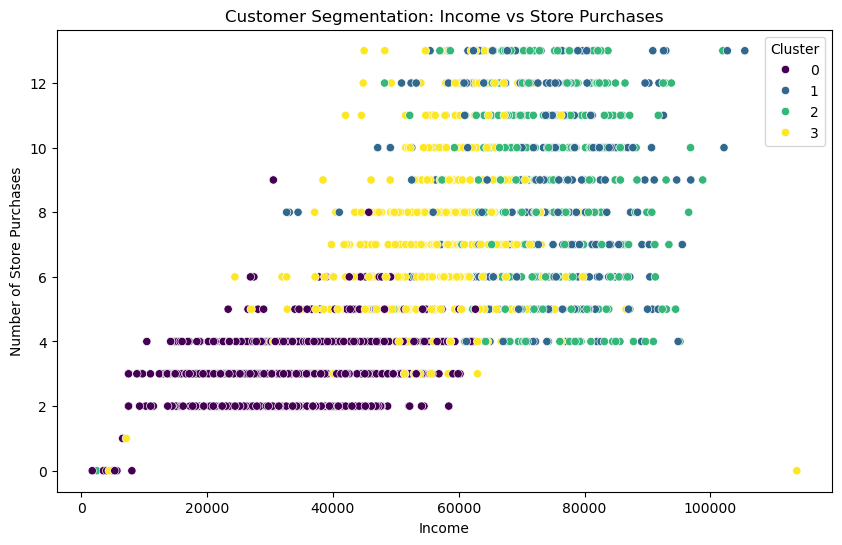

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ifood2['Income'], y=ifood2['NumStorePurchases'], hue=ifood2['Cluster'], palette='viridis')
plt.xlabel('Income')
plt.ylabel('Number of Store Purchases')
plt.title('Customer Segmentation: Income vs Store Purchases')
plt.legend(title="Cluster")
plt.show()

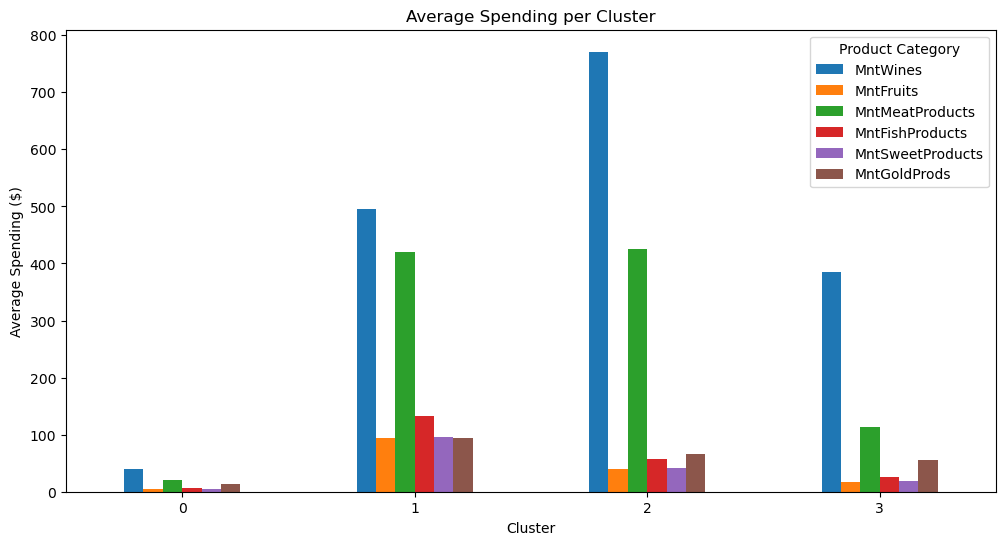

In [54]:
# ---- AVERAGE SPENDING PER CLUSTER ----
cluster_summary = ifood2.groupby("Cluster").mean()[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title("Average Spending per Cluster")
plt.ylabel("Average Spending ($)")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Product Category")
plt.show()

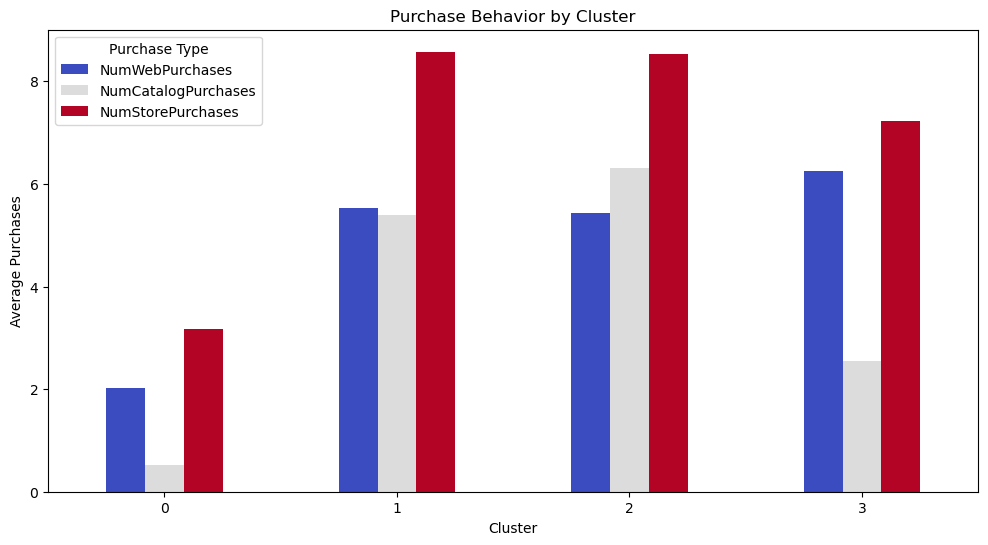

In [56]:
# ---- PURCHASE BEHAVIOR ACROSS CLUSTERS ----
purchase_behavior = ifood2.groupby("Cluster").mean()[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
purchase_behavior.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title("Purchase Behavior by Cluster")
plt.ylabel("Average Purchases")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Purchase Type")
plt.show()